# Unit 3 Lecture 10 - Constistency of MLE, Covariance Matrices, and Multivariate Statistics

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Log-Likelihood = 0 doesn't always give MLE

Sometimes the maximum of a function isn't found with the derivative. In those cases, you have to employ other methods to find the MLE. There isn't necessarily one prescription for this process. Example:

$X_1, \cdots, X_n \sim Unif[0, \theta]$

$L_n(\theta | X_1, \cdots, X_n) = \prod_n f_X(x|\theta) = \dfrac{1}{\theta^n}$

This function finds its argmax in $max(X_i)$, where the likelihood function isn't continuous, and the derivative isn't zero.

- (Scripted Example 1)

## Consistency of MLE

Under mild regularity conditions (continuity in $\theta$ of the pdf $p_{\theta}$ almost everywhere),

$\hat{\theta_n}^{MLE} \xrightarrow[n \to \infty]{P} \theta$

which holds true in the multivariate case, meaning when $\theta$ is a vector of parameters.

## Random Vector

$X = \begin{pmatrix}
X^{(1)} \\
\vdots \\
X^{(d)}
\end{pmatrix}$

is a $d$ x $1$ random vector, or a random vector $\in \mathbb{R}^d$, where each $X^{(k)}$ is an RV. 

- The pdf of $X$ is the joint pdf of the elements
- The cdf of $X$ is $P(X^{(1)} \leq x^{(1)}, \cdots, X^{(d)} \leq x^{(d)})$ (similar to pdf of max, but $x$ is a vector)
- $X$ converges in probability when all $X^{(k)}$ individually converge in probability.  If $X$ = $\hat{\theta}_n$, a vector of estimators, all $X^{(k)}$ must be consistent estimators for $\hat{\theta}_n$ to be consistent.

e.g.

$X \sim \mathcal{N}(\mu, \sigma^2)$

$\hat{\theta}_n = \begin{pmatrix}
\bar{X}_n \\
\dfrac{\sum_n(X_i - \bar{X}_n)^2}{n}
\end{pmatrix}$

converges in probability to

$\theta = \begin{pmatrix}
\mu \\
\sigma^2 
\end{pmatrix}$

- A random vector has a gaussian distribution iff all linear combinations of its elements are of that distribution. This isn't always the case.

## Covariance

- $Cov(X, Y) = E[(X - E[X])(Y - E[Y])]$
- $= E[(X)(Y - E[Y])]$
- $= E[(X - E[X])(Y)]$
- $= E[XY] - E[X]E[Y]$
- $Cov(X, X) = Var(X)$

### Covariance & Independence

- $X, Y$ are independent $\Rightarrow Cov(X, Y) = 0$
- $Cov(X, Y) = 0 \nRightarrow X, Y$ are independent

### Covariance Matrix

Covariance matrix $\Sigma$ is the total representation of covariance between all of the elements of a random vector. It has the variances on the main diagonal and covariances symmetrically above and below.

- $\Sigma_{i, j} = Cov(X^{(i)}, X^{(j)})$

e.g.

$ M = \begin{pmatrix}
X \\
Y \\
Z
\end{pmatrix}$

$\Sigma_M = E[(M - E[M])(M - E[M])^T]$

$= E\begin{pmatrix}\begin{pmatrix}
X - E[X] \\
Y - E[Y] \\
Z - E[Z] 
\end{pmatrix}
\begin{pmatrix}
X - E[X] & Y - E[Y] & Z - E[Z] 
\end{pmatrix}\end{pmatrix}$

$= \begin{pmatrix}
Cov(X, X) & Cov(X, Y) & Cov(X, Z) \\
Cov(Y, X) & Cov(Y, Y) & Cov(Y, Z) \\
Cov(Z, X) & Cov(Z, Y) & Cov(Z, Z)
\end{pmatrix}$


### Affine Transformation of a Covariance Matrix

Univariate case

$Var(aX + b) = a^2 Var(X)$

The multivariate case is similar, but matrices don't have the distributive property, so...

- $Var(AX + B) = A \Sigma_X A^T$

## Multivariate CLT

- $\sqrt{n}(\bar{X}_n - \mu) \to \mathcal{N}(0, \Sigma)$

Where $\bar{X}_n$ is the average of a set of iid copies $\{X_1, \cdots, X_n\}$ of random vector $X$ with $E[X] = \mu$ and $Var(X) = \Sigma$, which, put another way, makes $\bar{X}_n$ a vector of averages. Each $\bar{X_n}^{(k)}$ represents the mean of the elements of $X_k$.

$X_k = \begin{pmatrix}
X^{(1)}_k \\
\vdots \\
X^{(d)}_k
\end{pmatrix}$

$\bar{X}_n = \begin{pmatrix}
\bar{X_n}^{(1)} \\
\vdots \\
\bar{X_n}^{(d)}
\end{pmatrix}$

and 

- $\sqrt{n} (\Sigma^{-1/2}) (\bar{X}_n - \mu) \to \mathcal{N}(0, I_d)$

Where $\Sigma^{1/2}$ is the square root of $\Sigma$, and it's the matrix s.t. $\Sigma^{-1/2} \Sigma^{-1/2} = \Sigma^{-1}$. 

This tranformation corresponds to the single variable version

$\sqrt{n}(\sigma^{-1})(\bar{X}_n - \mu) \to \mathcal{N}(0, 1)$

## Multivariate Delta Method

Univariate with some RV $X$ with variance $\sigma^2$ and parameter $\theta$. If $\hat{\theta}_n$ is consistent,

$\sqrt{n}(\hat{\theta}_n - \theta) \to \mathcal{N}(0, \sigma^2)$

$\sqrt{n}(g(\hat{\theta}_n) - g(\theta)) \to \mathcal{N}(0, g\prime(E[X])^2\sigma^2)$

So, multivariate

- $\sqrt{n}(\hat{\theta}_n - \theta) \to \mathcal{N}(0, \Sigma)$

- $\sqrt{n}(g(\hat{\theta}_n) - g(\theta)) \to \mathcal{N}(0, \nabla g(\theta)^T\Sigma \nabla g(\theta))$

Where $\nabla g$ is the vector of first derivatives of $g$

- NOTE: for the homework, pay very close attention to the variability of the language for this sort of problem. Here, we're talking about $g(\hat{\theta})$, where $g$ makes the transformation. But, think about what it means for $\hat{\theta}$ to instead be the transforming function $g$ of some estimator. You would rewrite the above above convergence formula to $g($estimator$)$... instead of $g(\hat{\theta})$. What are you then taking the derivative wrt? Also very important, what are we converging to, and what does that make $X$ in the above formula?

## Scripted Examples

### 1. Can't Always Find MLE with Derivative

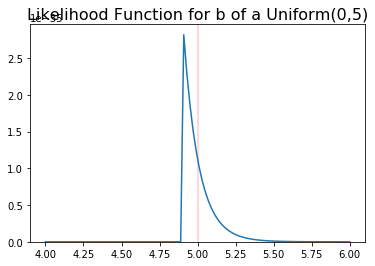

The red line shows the actual b=5. The peak of Ln will always be at an x value less than b


In [52]:
n = 50
Xn = np.random.uniform(0, 5, n)
Xmax = max(Xn)
x = np.linspace(4, 6, 100)
Ln = np.array([0 if i < Xmax else 1/i**n for i in x])

plt.title('Likelihood Function for b of a Uniform(0,5)', fontsize=16)
plt.plot([5, 5], [0, 1], c='red', alpha=0.2)
plt.plot(x, Ln)
plt.ylim((0, max(Ln) + 1/20 * max(Ln)))
plt.show()

print('The red line shows the actual b=5. The peak of Ln will always be at an x value less than b')